In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import tensorflow as tf
import matplotlib.pyplot as plt

In [14]:
# read files from directory https://www.tensorflow.org/tutorials/images/classification
# it uses generators to reduce the memory
desire_size = (100,100)
batch_size = 400
train_ds = tf.keras.utils.image_dataset_from_directory(
  "data/train",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=desire_size,
  batch_size=batch_size,
)

val_ds = tf.keras.utils.image_dataset_from_directory(
  "data/train",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=desire_size,
  batch_size=batch_size)

class_names = train_ds.class_names

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 4252 files belonging to 11 classes.
Using 3402 files for training.
Found 4252 files belonging to 11 classes.
Using 850 files for validation.


In [15]:
data_augmentation = Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.4),
  tf.keras.layers.RandomZoom(0.2),
  # tf.keras.layers.RandomContrast([0.1,0.2]),
  # tf.keras.layers.RandomBrightness(0.1),
])

In [16]:
# network using all the channels
model2 = Sequential([
  layers.Rescaling(1./255, input_shape=(desire_size[0], desire_size[1], 3)),
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(class_names))
])
model2.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

In [17]:
epochs = 20
history = model2.fit(
  train_ds,
  validation_data = val_ds,
  epochs = epochs
)

Epoch 1/20
9/9 [==============================] - 38s 3s/step - loss: 2.3600 - accuracy: 0.1367 - val_loss: 2.3606 - val_accuracy: 0.1447
Epoch 2/20
9/9 [==============================] - 24s 3s/step - loss: 2.3296 - accuracy: 0.1555 - val_loss: 2.3185 - val_accuracy: 0.2141
Epoch 3/20
9/9 [==============================] - 26s 3s/step - loss: 2.2416 - accuracy: 0.2243 - val_loss: 2.1744 - val_accuracy: 0.2576
Epoch 4/20
9/9 [==============================] - 24s 3s/step - loss: 2.0316 - accuracy: 0.2801 - val_loss: 1.9096 - val_accuracy: 0.3259
Epoch 5/20
9/9 [==============================] - 27s 3s/step - loss: 1.7876 - accuracy: 0.3727 - val_loss: 1.6879 - val_accuracy: 0.3953
Epoch 6/20
9/9 [==============================] - 25s 3s/step - loss: 1.5883 - accuracy: 0.4039 - val_loss: 1.6032 - val_accuracy: 0.4047
Epoch 7/20
9/9 [==============================] - 23s 3s/step - loss: 1.4967 - accuracy: 0.4459 - val_loss: 1.5330 - val_accuracy: 0.4553
Epoch 8/20
9/9 [==================

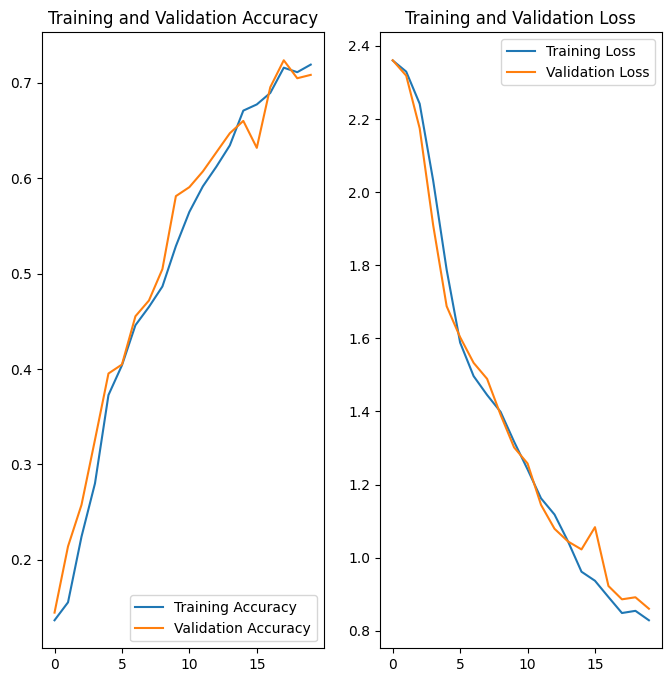

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()